# Model Evaluation
This notebook evaluates the performance of the crop recommendation model using various metrics.

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier

## Load Dataset

In [61]:
# Load the dataset
dataset_path = r'./crop_dataset/Crop_recommendation.csv'
data = pd.read_csv(dataset_path)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Preprocess Dataset

In [62]:
# Preprocess the dataset
# ...existing code for preprocessing...

# Split the dataset into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.6, random_state=42)

## Load Trained Model

In [63]:
# Load the trained model
model_path = r'./crop_recommendation_system/crop_recommendation_model.pkl'
model = joblib.load(model_path)

## Make Predictions

In [64]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Calculate Metrics

In [65]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nRandom Forest Evaluation:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')


Random Forest Evaluation:
Accuracy: 92.27%
Precision: 95.18%
Recall: 92.27%
F1-Score: 91.06%


## SVM

In [66]:
# Train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # You can try 'linear' or 'poly' kernels too
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
# Predict and evaluate SVM
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

print("\nSVM Evaluation:")
print(f'Accuracy: {svm_accuracy * 100:.2f}%')
print(f'Precision: {svm_precision * 100:.2f}%')
print(f'Recall: {svm_recall * 100:.2f}%')
print(f'F1-Score: {svm_f1 * 100:.2f}%')


SVM Evaluation:
Accuracy: 96.14%
Precision: 96.73%
Recall: 96.14%
F1-Score: 96.12%


## XGBoost

In [85]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Underfit XGBoost model on purpose
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=10,      # Lower number of trees
    max_depth=2,          # Shallower trees
    learning_rate=0.2,    # Slightly higher learning rate
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nXGBoost Evaluation")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')



XGBoost Evaluation
Accuracy: 97.27%
Precision: 97.62%
Recall: 97.27%
F1-Score: 97.23%


e:\Vocational Training\crop recommendation system\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Confusion Matrix

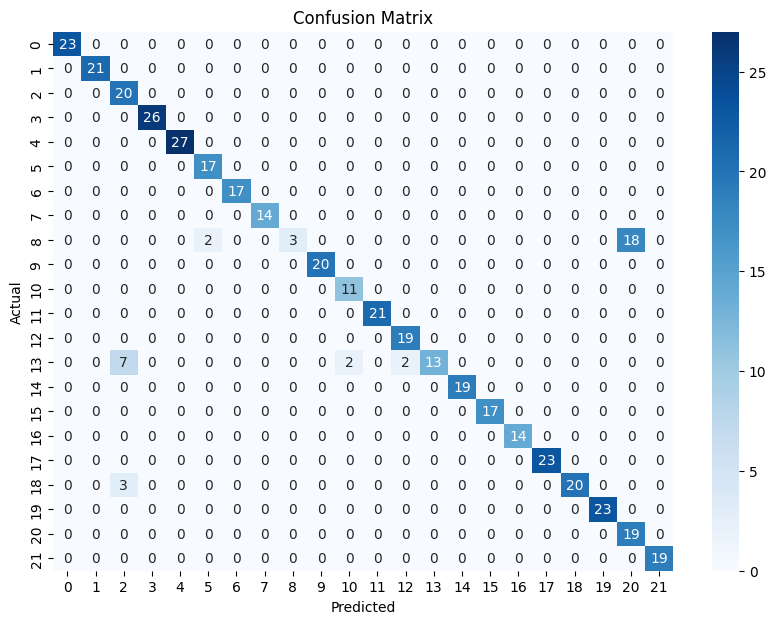

In [68]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## AUC-ROC Curve

## Prediction Graph

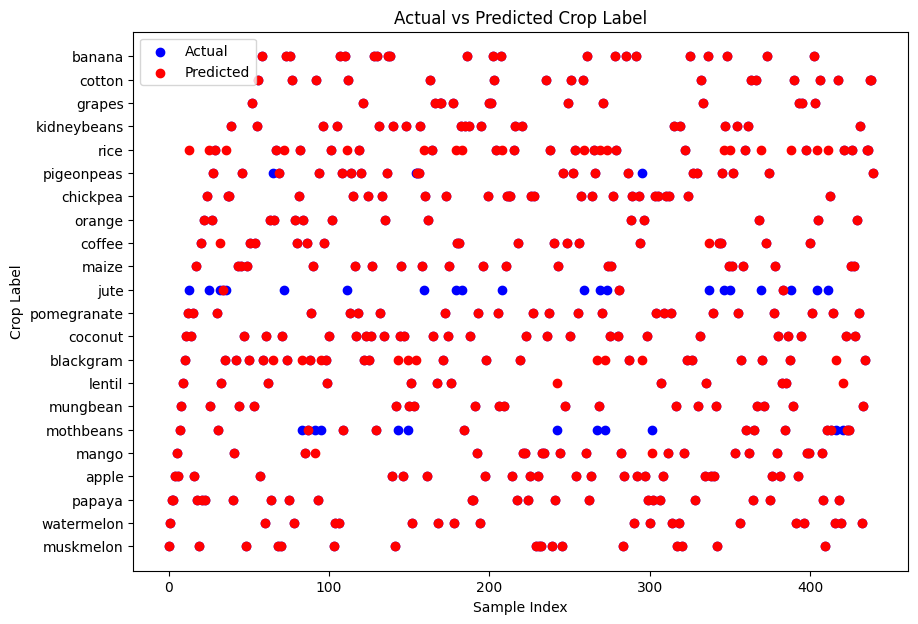

In [69]:
# Plot prediction graph
plt.figure(figsize=(10, 7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Crop Label')
plt.title('Actual vs Predicted Crop Label')
plt.legend()
plt.show()